In [2]:
%load_ext autoreload
%autoreload 2

from mcmc_lotte import *
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
import csv
import pandas as pd
import pyphi

[autoreload of numpy.core.overrides failed: Traceback (most recent call last):
  File "/opt/anaconda3/envs/3.9/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/opt/anaconda3/envs/3.9/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/opt/anaconda3/envs/3.9/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 790, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/opt/anaconda3/envs/3.9/lib/python3.9/site-packages/numpy/core/overrides.py", line 6, in <module>
    from numpy.core._multiarray_umath import (
ImportError: cannot import name 'implement_array_function' from 'numpy.core._multiarray_umath' (/opt/anaconda3/envs/3.9/lib/

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of numpy failed: Traceback (most recent call last):
  File "/opt/anaconda3/envs/3.9/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/opt/anaconda3/envs/3.9/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/opt/anaconda3/envs/3.9/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 790, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/opt/anaconda3/envs/3.9/lib/python3.9/site-packages/numpy/__init__.py", line 223, in <module>
    core.getlimits._register_known_types()
  File "/opt/anaconda3/envs/3.9/lib/python3.9/site-packages/numpy/core/getlimits.py", line 224, in _register_known_types
    with numeric.errstate(

ImportError: Numba needs NumPy 1.24 or less

In [2]:
test_name = 'lotte_test'

In [28]:
temperatures = np.linspace(0.5, 50, 50)

In [10]:
means_mag, stds_mag, means_sus, stds_sus = run_simulation(1, 5000, temperatures, 10)

In [61]:
ns = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
tcs = []
peaks = []
for n in ns:
    means_mag, stds_mag, means_sus, stds_sus = run_simulation(10, 5000, temperatures, n)
    idx = np.argmax(means_sus)
    tcs.append(temperatures[idx])
    peaks.append(means_sus[idx])


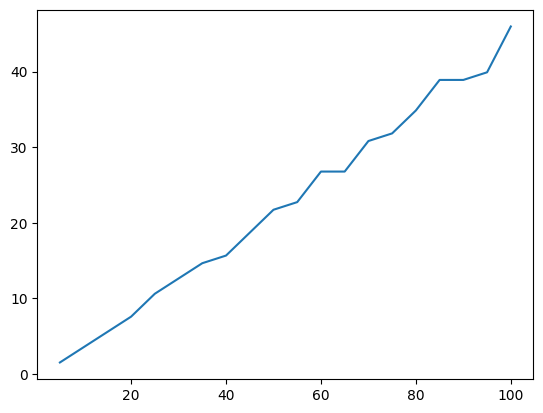

In [62]:
plt.plot(ns, tcs)

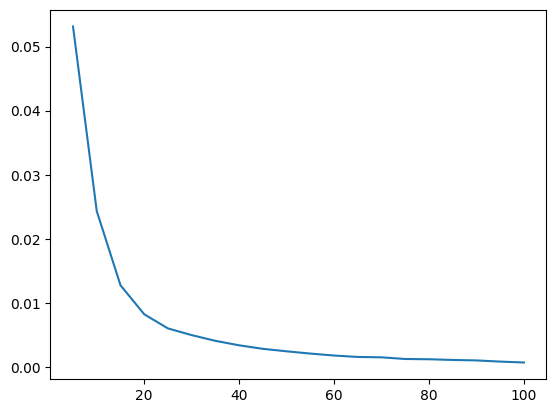

In [63]:
plt.plot(ns, peaks)

In [50]:
results = powerlaw.Fit(peaks)
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare( 'power_law',  'lognormal')
R, p

Calculating best minimal value for power law fit
15.702521077410944
26.587155194644822


(-0.401863331391656, 0.5621105047522933)

In [69]:
with open('DTI_avg_log.csv', 'r') as file:
    reader = csv.reader(file, delimiter=',')
    data = list(reader)
DTI_log = pd.DataFrame(data, dtype = 'float64')
dti_c_matrix = DTI_log.values
dti_c_matrix
n = 90

In [93]:
temperatures = np.linspace(0.01, 50, 50)
sim_data = run_simulation(30, 5000, temperatures, n, dti_c_matrix)

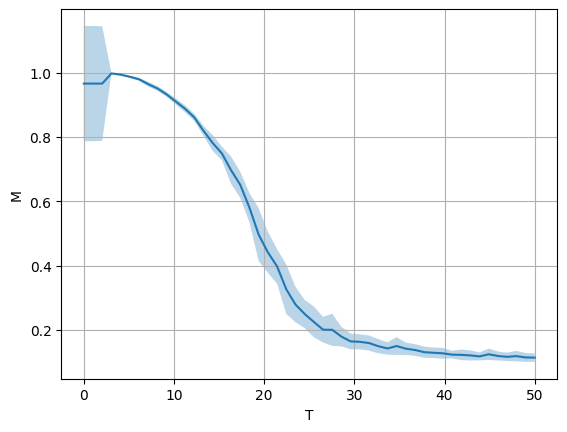

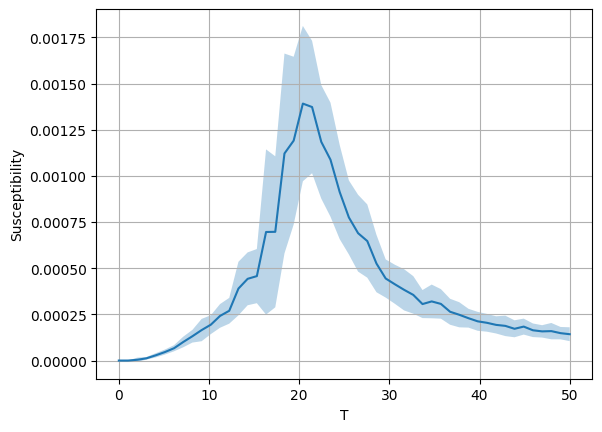

In [94]:
plot_results(sim_data, temperatures, test_name, save=False)

In [76]:
with open('fMRI_avg.csv', 'r') as file:
    reader = csv.reader(file, delimiter=',')
    data = list(reader)
fMRI = pd.DataFrame(data, dtype = 'float64')
fmri_c_matrix = fMRI.values
n = 90

In [95]:
temperatures = np.linspace(0.01, 50, 50)
sim_data = run_simulation(30, 5000, temperatures, n, fmri_c_matrix)

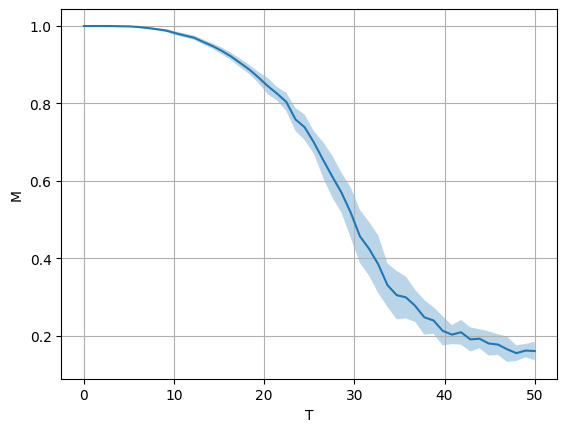

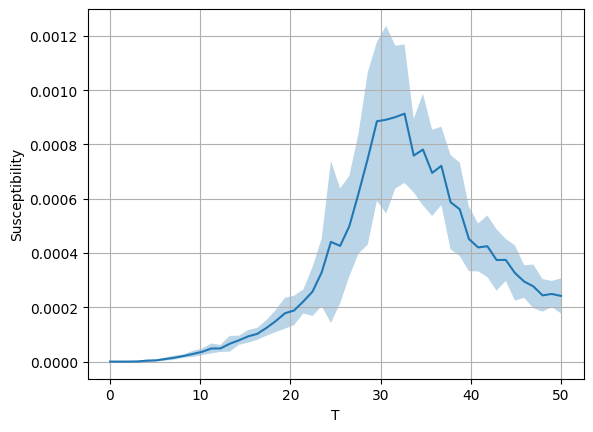

In [96]:
plot_results(sim_data, temperatures, test_name, save=False)